<a href="https://colab.research.google.com/github/xmuhammadaziz09/Data_mining/blob/main/Prediksi_Regresi_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install xgboost scikit-learn

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Regressor models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Ganti path di bawah dengan path ke file kamu
file_path = '//content/drive/MyDrive/tes.csv'

df = pd.read_csv(file_path)
print(df.head())  # opsional, tampilkan 5 data pertama

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  ...        age  gender       ethnicity jaundice austim  \
0         0         1  ...  15.599481       m  White-European      yes     no   
1         1         0  ...  27.181099       m           Asian       no     no   
2         1         1  ...  31.643906       m  White-European      yes     no   
3         0         0  ...  25.369210       m               ?       no     no   
4         0         0  ...   9.078580       m               ?       no     no   

  contry_of_res used_app_before     re

In [10]:
df_reg = df.drop(columns=["ID", "age_desc", "relation"])  # kita prediksi kolom 'result'

# 3. Encode data kategorikal
label_encoders = {}
for column in df_reg.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_reg[column] = le.fit_transform(df_reg[column])
    label_encoders[column] = le

# 4. Pisahkan fitur dan target
X = df_reg.drop("result", axis=1)
y = df_reg["result"]

# 5. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Inisialisasi semua model
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
    "MLP (Neural Network)": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}


In [11]:
# Evaluasi tiap model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2}

    print(f"===== {name} =====")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f} ({r2 * 100:.2f}%)\n")


===== Random Forest =====
MAE: 0.3967
MSE: 0.9553
RMSE: 0.9774
R-squared: 0.9491 (94.91%)

===== XGBoost =====
MAE: 0.6100
MSE: 1.2445
RMSE: 1.1156
R-squared: 0.9337 (93.37%)

===== MLP (Neural Network) =====
MAE: 2.1354
MSE: 7.6914
RMSE: 2.7733
R-squared: 0.5905 (59.05%)



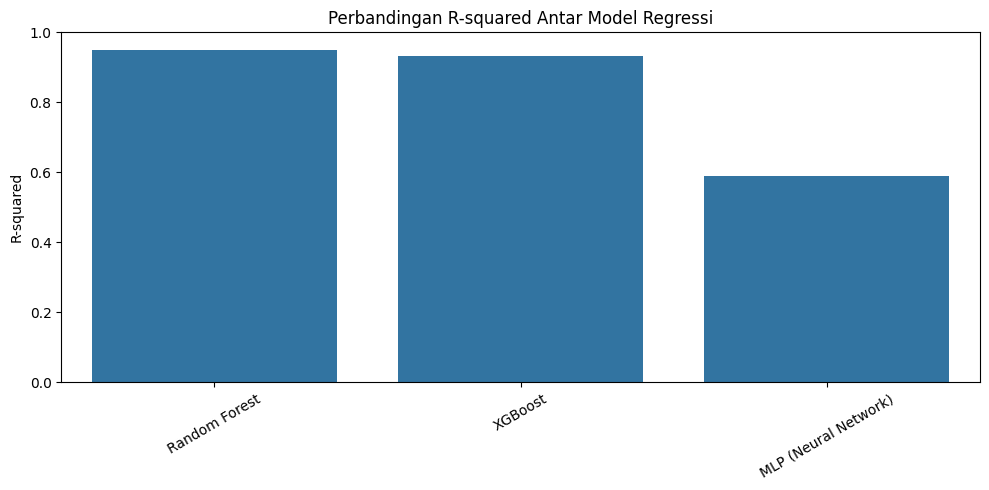

In [12]:
# 8. Visualisasi R-squared semua model
model_names = list(results.keys())
r2_scores = [results[m]["R2"] for m in model_names]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_scores)
plt.title("Perbandingan R-squared Antar Model Regressi")
plt.ylabel("R-squared")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()